## HUMBIO51 Assignment Week 8

##  Learning Objectives
***Students should be able to*** 

<li> <a href=#LD>Find variants in linkage disequilibrium (LD) with a target variant using tabix and PLINK.</a></li>
<li> <a href=#LoadTable> Load a data table in .csv format into Python</a></li>
<li> <a href=#Scatter>Make a scatter plot in Python </a></li>
<li> <a href=#GWAS> Interpret data from a genome wide association study (GWAS)</a></li>
 


## Question 1

This question is based off of data from a study in which  researchers performed genome wide association studies (GWAS) on lung disease severity in cystic fibrosis. 

The reference is Ganesh et al. Nature Genetics 41, 1191–1198 (2009) doi:10.1038/ng.466.

The question will focus on SNP: rs4895441



For this quesion you will need the variant files from class for the 1000 Genomes Project in the PLINK binary format: 
    
* **/data/project/1kg_phase1_all.bed** -- binary encoding of subject genotypes (do not be fooled by the file extension, this is NOT the 4-column bed file format we have been using). 

* **/data/project/1kg_phase1_all.bim** -- list of all variants in the subject population 
* **/data/project/1kg_phase1_all.fam** -- list of all subject id's in the 1000's genome project

NOTE: Your notes from class 7 on working with pandas dataframes may be helpful for this assignment. 

### Question 1a

In [1]:
import warnings
warnings.filterwarnings('ignore')

#change your working directory to Week_8 
## BEGIN SOLUTION ##
import os 
os.chdir("Week_8")
os.getcwd()
## END SOLUTION ## 

'/home/jovyan/humbio51/Weekly Assignments/Week_8'

### Question 1b

In [ ]:
#identify all variants that are in linkage disequilibrium with rs4895441 (use the -r2 flag)
# Hint: use an --ld-window size of 10000
## BEGIN SOLUTION ## 
!plink  --bfile /data/project/1kg_phase1_all --r2  --ld-snp rs4895441 --ld-window 10000 --out r2.for.rs4895441 --threads 10

## END SOLUTION ##


### Question 1c

In [2]:
#Display the SNPs that are in linkage disequilibrium with rs4895441 using R2 coefficients. 
## BEGIN SOLUTION ## 
!cat r2.for.rs4895441.ld
## END SOLUTION ## 


 CHR_A         BP_A                 SNP_A  CHR_B         BP_B                 SNP_B           R2 
     6    135426573             rs4895441      6    135282735            rs61738647     0.201112 
     6    135426573             rs4895441      6    135390836             rs1547247     0.342084 
     6    135426573             rs4895441      6    135402339             rs9399136     0.709403 
     6    135426573             rs4895441      6    135406178             rs1331309     0.716441 
     6    135426573             rs4895441      6    135406182           rs201166925     0.201936 
     6    135426573             rs4895441      6    135411228             rs9376090      0.73923 
     6    135426573             rs4895441      6    135418632            rs66650371     0.690557 
     6    135426573             rs4895441      6    135418916             rs7776054     0.554292 
     6    135426573             rs4895441      6    135419018             rs9399137     0.713957 
     6    135426573 

### Question 1d 

In [ ]:
#Identify all variants that are in linkage disequilibrium with rs4895441 (use the -r flag)
# Use an --ld-window of size 10000 

## BEGIN SOLUTION ## 
!plink  --bfile /data/project/1kg_phase1_all --r  --ld-snp rs4895441 --ld-window 10000 --out r.for.rs4895441 --threads 10

## END SOLUTION ## 

In [3]:
#Display the SNPs that are in linkage disequilibrium with rs4895441 using R coefficients. 
#Print only the first 20 rows of this file. 
## BEGIN SOLUTION ## 
!head -n20 r.for.rs4895441.ld
## END SOLUTION ## 



 CHR_A         BP_A                 SNP_A  CHR_B         BP_B                 SNP_B            R 
     6    135426573             rs4895441      6    135282735            rs61738647     0.448455 
     6    135426573             rs4895441      6    135390836             rs1547247     0.584879 
     6    135426573             rs4895441      6    135402339             rs9399136     0.842261 
     6    135426573             rs4895441      6    135406178             rs1331309     0.846429 
     6    135426573             rs4895441      6    135406182           rs201166925    -0.449373 
     6    135426573             rs4895441      6    135411228             rs9376090     0.859785 
     6    135426573             rs4895441      6    135418632            rs66650371     0.830997 
     6    135426573             rs4895441      6    135418916             rs7776054     0.744508 
     6    135426573             rs4895441      6    135419018             rs9399137      0.84496 
     6    135426573 

### Question 1e 

What do you notice in comparing the -r analysis with the -r2 analysis? Specifically, what filtering threshold is the -r2 analysis applying by default? 


**ANSWER:**  0.2 r^2 threshold is applied by default

### Question 1f

In [4]:
#Read the list of SNPs in linkage disequilibrium with rs4895441 using R2 coefficients into a dataframe in Python 
#and print the sorted the list.
#HINT: When reading in the dataframe use the delim_whitespace=True argument. 

## BEGIN SOLUTION ## 
import pandas as pd
r2_data=pd.read_table("r2.for.rs4895441.ld",header=0,delim_whitespace=True)
r2_data.head()
## END SOLUTION ## 


,CHR_A,BP_A,SNP_A,CHR_B,BP_B,SNP_B,R2
0,6,135426573,rs4895441,6,135282735,rs61738647,0.201112
1,6,135426573,rs4895441,6,135390836,rs1547247,0.342084
2,6,135426573,rs4895441,6,135402339,rs9399136,0.709403
3,6,135426573,rs4895441,6,135406178,rs1331309,0.716441
4,6,135426573,rs4895441,6,135406182,rs201166925,0.201936


### Question 1g

In [5]:
#Use a for loop to print out a list of SNPs in linkage disequilibrium with rs4895441 
#with an R-value greater than .8

## BEGIN SOLUTION ## 
num_rows=r2_data.shape[0]
for i in range(num_rows): 
    cur_row=r2_data.iloc[i]
    cur_r=cur_row['R2']
    if cur_r >0.8: 
        print(cur_row['SNP_B'])
## END SOLUTION ## 

rs4895441
rs9376092
rs9389269
rs9402686


## Question 2

Import the plotnine package for plotting

In [7]:
%%capture

## %%capture Suppresses all outputs from this cell, including warnings

##BEGIN SOLUTION
from plotnine import *
##END SOLUTION

Generate a scatterplot with base pairs (BP_B) along the x-axis and the correlation coefficient (R) along the y-axis. Add the rs text labels to the plot for R^2 above 0.7. (hint: see Class 15 notebook,but you will need to edit the get labels function to use the R^2 column as input instead of R). 

In [8]:
## We use the same get_labels function as from class 15 to find labels and positions for SNPs with an r^2 greater than a specified 
##  threshold 
def get_labels(r2_thresh,data,r2_column="R2",snp_b_column="SNP_B",text_offset=0.15): 
    '''
    r2_thresh -- the threshold of R2 to show labels for 
    data -- pandas dataframe with plink  output 
    r2_column -- column name in the pandas dataframe where r2 values are stored. usually this is 'R2'
    snp_b_column -- column name in the pandas dataframe where SNP_B is stored. Usually this is 'SNP_B'
    '''
    labels=[]
    x=[]
    y=[]
    offset=0
    for index,row in data.iterrows(): 
        if row[r2_column]>=r2_thresh:
            labels.append(row[snp_b_column])
            x.append(row['BP_B'])
            y.append(row['R2']+offset)
            offset=offset+text_offset
        else: 
            labels.append('')
            x.append(row['BP_B'])
            y.append(row['R2'])
    return x,y,labels

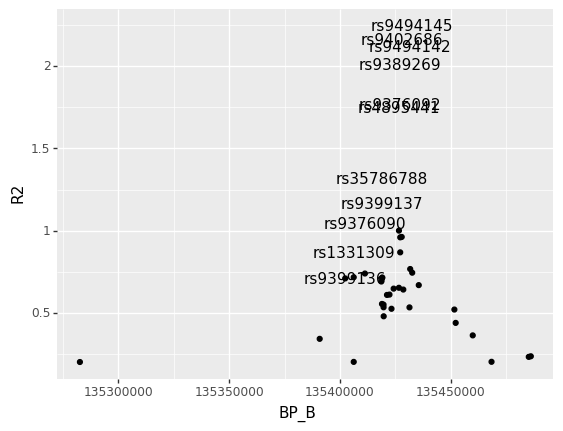

<ggplot: (8756820215653)>

In [10]:
## BEGIN SOLUTION ## 
x=r2_data['BP_B']
y=r2_data['R2']
x_rs,y_rs,labels_rs=get_labels(0.7,r2_data)
(ggplot(r2_data,aes(x='BP_B',y='R2'))+
 geom_point()+
 geom_text(mapping=aes(x=x_rs,y=y_rs,label=labels_rs))+
 xlab("BP_B")+
 ylab("R2"))
## END SOLUTION ## 

## Question 3

In your Week_8 directory there is a file called 'Ganesh_Nat. Genetics_2009_PMID_19862010_ng.466-S2.csv'. 

The file is from the Supplementary Material published in Ganesh et al. Nature Genetics 41, 1191–1198 (2009) doi:10.1038/ng.46. 

The file contains a table of p-values for SNPs that were identified in the GWAS association studies for different traits.

The third column of the file contains the locus or chromosome number. 

### Question 3a

In [12]:
#Read the .csv file from the Ganesh paper into a pandas dataframe. 
#HINT: MAKE SURE YOU ARE READING IN A CSV FILE NOT A TSV FILE. 
## BEGIN SOLUTION ## 
import pandas as  pd
ganesh=pd.read_csv("Ganesh_Nat_Genetics_2009_PMID_19862010_ng.466-S2.csv",header=0,sep=',')
## END SOLUTION ## 

### Question 3b

In [13]:
#view the dataframe from 3a so you can see the header and columns
## BEGIN SOLUTION ## 
ganesh.head()
## END SOLUTION ## 

,FROM: Nat Genet. 2009 Nov;41(11):1191-8. doi: 10.1038/ng.466. Epub 2009 Oct 11. PMID: 19862010,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,Supplementary Table 3: CHARGE meta-analysis re...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,locus#,SNPID,Chr,PhysPos,maj_all,min_all,InRefGene,RefGenes60kb,ClosestRefGene,Allele1,Allele2,Effect,StdErr,P.value,Direction,trait
2,1,rs857684,1,156842353,C,T,NaN,OR10Z1;SPTA1;OR10X1;OR6Y1,OR10Z1,t,c,-0.0022,4.00E-04,8.21E-09,-?--,mchc
3,1,rs2479868,1,156846693,C,T,NaN,OR10Z1;SPTA1;OR10X1,SPTA1,t,c,-0.0021,4.00E-04,1.12E-08,-?--,mchc
4,1,rs2157691,1,156849462,G,C,SPTA1,OR10Z1;SPTA1;OR10X1,SPTA1,c,g,-0.0022,4.00E-04,6.05E-09,-?--,mchc


### Question 3c

In [14]:
#Now that you have viewed the .csv file, adjust the skiprows and the header argument to make
#the row with locus#, SNIPID, Chr ... the header and to skip any rows above that. 
## BEGIN SOLUTION ## 
ganesh=pd.read_csv("Ganesh_Nat_Genetics_2009_PMID_19862010_ng.466-S2.csv",header=0,sep=',',skiprows=2)

## END SOLUTION ## 

### Question 3d

In [15]:
#view the dataframe from 3c so you can see the header and columns
## BEGIN SOLUTION ## 
ganesh.head()
## END SOLUTION ## 

,locus#,SNPID,Chr,PhysPos,maj_all,min_all,InRefGene,RefGenes60kb,ClosestRefGene,Allele1,Allele2,Effect,StdErr,P.value,Direction,trait
0,1,rs857684,1,156842353,C,T,NaN,OR10Z1;SPTA1;OR10X1;OR6Y1,OR10Z1,t,c,-0.0022,0.0004,8.210000e-09,-?--,mchc
1,1,rs2479868,1,156846693,C,T,NaN,OR10Z1;SPTA1;OR10X1,SPTA1,t,c,-0.0021,0.0004,1.120000e-08,-?--,mchc
2,1,rs2157691,1,156849462,G,C,SPTA1,OR10Z1;SPTA1;OR10X1,SPTA1,c,g,-0.0022,0.0004,6.050000e-09,-?--,mchc
3,1,rs2518491,1,156851854,C,T,SPTA1,OR10Z1;SPTA1;OR10X1,SPTA1,t,c,-0.0022,0.0004,5.720000e-09,-?--,mchc
4,1,rs2779116,1,156852039,C,T,SPTA1,OR10Z1;SPTA1;OR10X1,SPTA1,t,c,-0.0022,0.0004,5.740000e-09,-?--,mchc


### Question 3e

In [16]:
#Make a subset of the dataframe from question 3d with just the SNPs in locus# 9 
## BEGIN SOLUTION ## 
locus_9=ganesh[ganesh['locus#']==9]
## END SOLUTION ##  

### Question 3f

In [17]:
#View the output of 3f 
## BEGIN SOLUTION ## 
locus_9
## END SOLUTION ## 

,locus#,SNPID,Chr,PhysPos,maj_all,min_all,InRefGene,RefGenes60kb,ClosestRefGene,Allele1,Allele2,Effect,StdErr,P.value,Direction,trait
445,9,rs7759398,6,135251527,C,A,NaN,ALDH8A1,ALDH8A1,a,c,-0.0049,0.0008,3.460000e-09,--+--,mcv
446,9,rs7759527,6,135251576,C,T,NaN,ALDH8A1,ALDH8A1,t,c,-0.0050,0.0008,1.910000e-09,--+--,mcv
447,9,rs13192235,6,135388044,G,A,HBS1L,HBS1L,HBS1L,a,g,0.0072,0.0009,6.120000e-15,+++++,mcv
448,9,rs1547247,6,135432529,G,A,NaN,HBS1L,HBS1L,a,g,0.0037,0.0005,5.930000e-12,++-?+,mcv
449,9,rs13220662,6,135437241,G,A,NaN,HBS1L,HBS1L,a,g,0.0055,0.0007,2.370000e-14,++++,mch
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
617,9,rs12660713,6,135559689,G,A,MYB,MYB,MYB,a,g,0.0041,0.0007,4.080000e-09,+++++,mcv
618,9,rs6920829,6,135561193,T,C,MYB,MYB,MYB,t,c,-0.0041,0.0007,4.310000e-09,-----,mcv
619,9,rs3752383,6,135564448,A,G,MYB,MYB,MYB,a,g,-0.0042,0.0007,3.530000e-09,-----,mcv
620,9,rs6936293,6,135577714,C,T,MYB,MYB,MYB,t,c,0.0043,0.0007,1.010000e-09,+++++,mcv


### Question 3g

In [18]:
#Make a subset of the dataframe from question 3e with just the mcv trait
## BEGIN SOLUTION ## 
locus_9_mcv=locus_9[locus_9['trait']=='mcv']
locus_9_mcv.head()
## END SOLUTION ##  

,locus#,SNPID,Chr,PhysPos,maj_all,min_all,InRefGene,RefGenes60kb,ClosestRefGene,Allele1,Allele2,Effect,StdErr,P.value,Direction,trait
445,9,rs7759398,6,135251527,C,A,NaN,ALDH8A1,ALDH8A1,a,c,-0.0049,0.0008,3.460000e-09,--+--,mcv
446,9,rs7759527,6,135251576,C,T,NaN,ALDH8A1,ALDH8A1,t,c,-0.0050,0.0008,1.910000e-09,--+--,mcv
447,9,rs13192235,6,135388044,G,A,HBS1L,HBS1L,HBS1L,a,g,0.0072,0.0009,6.120000e-15,+++++,mcv
448,9,rs1547247,6,135432529,G,A,NaN,HBS1L,HBS1L,a,g,0.0037,0.0005,5.930000e-12,++-?+,mcv
450,9,rs13220662,6,135437241,G,A,NaN,HBS1L,HBS1L,a,g,0.0046,0.0005,1.170000e-21,+++++,mcv


### Question 3h

For this question, you can take the -log of a dataframe in pandas using the following code:

In [19]:
import numpy

In [ ]:
y=-numpy.log10(df["column name"])
#note: replace 'df' with the name of your dataframe and "column name" with the name of your column of interest 

In [21]:
#you might find the following function helpful
def get_labels_generic(thresh,data,metric_column="R2",snp_column="SNP_B",base_column="BP_B",text_offset=0.15): 
    '''
    thresh -- the threshold of the metric to show labels for 
    data -- pandas dataframe with plink  output 
    metric_column -- column name in the pandas dataframe where metric values are stored (i.e. R, R2,P.value)
    snp_column -- column name in the pandas dataframe where SNP is stored (i.e. SNP_B or SNPID)
    base_column -- column name where base pair information is stored (i.e. BP_B)
    '''
    labels=[]
    x=[]
    y=[]
    offset=0
    for index,row in data.iterrows(): 
        if row[metric_column]>=thresh:
            labels.append(row[snp_column])
            x.append(row[base_column])
            y.append(row[metric_column]+offset)
            offset=offset+text_offset
        else: 
            labels.append('')
            x.append(row[base_column])
            y.append(row[metric_column])
    return x,y,labels

In [22]:
locus_9_mcv['-logPvalue']=-numpy.log10(locus_9_mcv['P.value'])

In [23]:
locus_9_mcv.head()

,locus#,SNPID,Chr,PhysPos,maj_all,min_all,InRefGene,RefGenes60kb,ClosestRefGene,Allele1,Allele2,Effect,StdErr,P.value,Direction,trait,-logPvalue
445,9,rs7759398,6,135251527,C,A,NaN,ALDH8A1,ALDH8A1,a,c,-0.0049,0.0008,3.460000e-09,--+--,mcv,8.460924
446,9,rs7759527,6,135251576,C,T,NaN,ALDH8A1,ALDH8A1,t,c,-0.0050,0.0008,1.910000e-09,--+--,mcv,8.718967
447,9,rs13192235,6,135388044,G,A,HBS1L,HBS1L,HBS1L,a,g,0.0072,0.0009,6.120000e-15,+++++,mcv,14.213249
448,9,rs1547247,6,135432529,G,A,NaN,HBS1L,HBS1L,a,g,0.0037,0.0005,5.930000e-12,++-?+,mcv,11.226945
450,9,rs13220662,6,135437241,G,A,NaN,HBS1L,HBS1L,a,g,0.0046,0.0005,1.170000e-21,+++++,mcv,20.931814


In [24]:
tmp=-numpy.log10(locus_9_mcv['P.value'])
tmp

445     8.460924
446     8.718967
447    14.213249
448    11.226945
450    20.931814
         ...    
617     8.389340
618     8.365523
619     8.452225
620     8.995679
621     8.879426
Name: P.value, Length: 83, dtype: float64

In [25]:
locus_9_mcv['-logPvalue']=tmp

In [26]:
locus_9_mcv.head()

,locus#,SNPID,Chr,PhysPos,maj_all,min_all,InRefGene,RefGenes60kb,ClosestRefGene,Allele1,Allele2,Effect,StdErr,P.value,Direction,trait,-logPvalue
445,9,rs7759398,6,135251527,C,A,NaN,ALDH8A1,ALDH8A1,a,c,-0.0049,0.0008,3.460000e-09,--+--,mcv,8.460924
446,9,rs7759527,6,135251576,C,T,NaN,ALDH8A1,ALDH8A1,t,c,-0.0050,0.0008,1.910000e-09,--+--,mcv,8.718967
447,9,rs13192235,6,135388044,G,A,HBS1L,HBS1L,HBS1L,a,g,0.0072,0.0009,6.120000e-15,+++++,mcv,14.213249
448,9,rs1547247,6,135432529,G,A,NaN,HBS1L,HBS1L,a,g,0.0037,0.0005,5.930000e-12,++-?+,mcv,11.226945
450,9,rs13220662,6,135437241,G,A,NaN,HBS1L,HBS1L,a,g,0.0046,0.0005,1.170000e-21,+++++,mcv,20.931814


['', '', '', '', '', '', '', '', '', '', '', 'rs7776054', 'rs9399137', 'rs9389268', 'rs11759553', '', '', 'rs4895440', 'rs4895441', '', 'rs9389269', 'rs9402686', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']


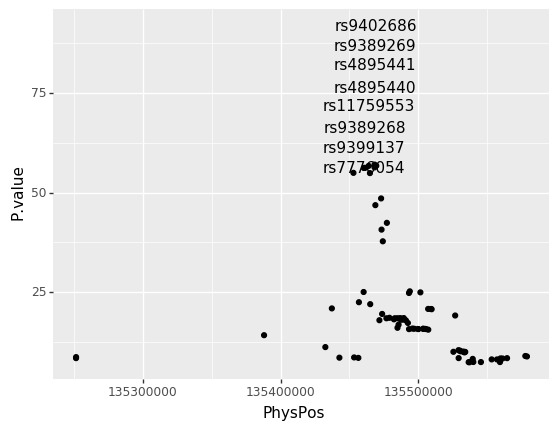

<ggplot: (8756820143469)>

In [27]:
#Make a scatter plot of the physical position (column name: 'PhysPos') on the x-axis versus 
#the -log10 of the p-value (column name:'P.value') for the SNPs in locus 9 on the y-axis. 
#Make sure to label your axes correctly. 
#Make a scatter plot of the physical position (column name: 'PhysPos') on the x-axis versus 
#the -log10 of the p-value (column name:'P.value') for the SNPs in locus 9 on the y-axis. 
#Make sure to label your axes correctly. 
#Label the points with -log10(P.value)>55 
## BEGIN SOLUTION ##
from plotnine import * 
x_lab,y_lab,labels=get_labels_generic(55,locus_9_mcv,metric_column='-logPvalue',snp_column="SNPID",base_column="PhysPos",text_offset=5)
print(labels)
(ggplot(locus_9_mcv,aes(x="PhysPos",y="-logPvalue"))+
 geom_point()+
 geom_text(mapping=aes(x=x_lab,y=y_lab,label=labels))+
 xlab("PhysPos")+
 ylab("P.value"))    
## END SOLUTION ## 

### Question 3i

Which SNP has the lowest p-value?

Hint: the pandas sort_values() function may be helpful. 

In [ ]:
## BEGIN SOLUTION ## 
rs940268
## END SOLUTION ## 

**YOUR ANSWER HERE**: 

## A NOTE ON THE COURSE PROJECT

We set up a folder called Course Project and added a Course Project Notebook. You can use this to start working on the code to analyze the variants that you have been assigned.